In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

Loading the dataset 

In [2]:
mnist = tf.keras.datasets.mnist

Splitting the data into train and test

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Loading the model 

In [5]:
model = tf.keras.models.Sequential()

In [6]:
#adding layers
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2679 - accuracy: 0.9229


Model Evaluation

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1480 - accuracy: 0.9549


In [10]:
print(accuracy)

0.9549000263214111


Saving the model and testing with some digit images

In [18]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


In [19]:
model = tf.keras.models.load_model('handwritten.model')

1/1 [==============================] - 0s 40ms/step
This digit is probably a 3


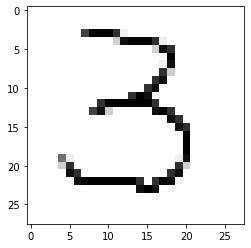

1/1 [==============================] - 0s 33ms/step
This digit is probably a 5


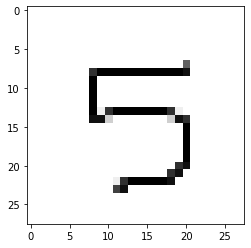

In [26]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error!")
    finally:
        image_number+=1